# EDA For APEAMCET 2022 Ranks Cutoff

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:\Data sets\APEAMCET-2022\Kaggle Copy\updated_copy.csv')


In [3]:
df.shape

(24756, 15)

In [4]:
df.head()

,S_No,College_Code,College_Name,College_Type,Region,District,Place,COED,Affliate_Univ,ESTD,Branch,Gender,Category,Rank,Fee
0,1,ACEE,ADARSH COLLEGE OF ENGINEERING,PVT,AU,WEST GODAVARI,GOLLAPROLU,COED,JNTUK,2008,CIV,BOYS,BC_A,143031,35000
1,2,ACEE,ADARSH COLLEGE OF ENGINEERING,PVT,AU,WEST GODAVARI,GOLLAPROLU,COED,JNTUK,2008,CIV,BOYS,BC_B,143031,35000
2,3,ACEE,ADARSH COLLEGE OF ENGINEERING,PVT,AU,WEST GODAVARI,GOLLAPROLU,COED,JNTUK,2008,CIV,BOYS,BC_C,143031,35000
3,4,ACEE,ADARSH COLLEGE OF ENGINEERING,PVT,AU,WEST GODAVARI,GOLLAPROLU,COED,JNTUK,2008,CIV,BOYS,BC_D,143031,35000
4,5,ACEE,ADARSH COLLEGE OF ENGINEERING,PVT,AU,WEST GODAVARI,GOLLAPROLU,COED,JNTUK,2008,CIV,BOYS,BC_E,143031,35000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24756 entries, 0 to 24755
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   S_No           24756 non-null  int64 
 1   College_Code   24756 non-null  object
 2   College_Name   24756 non-null  object
 3   College_Type   24756 non-null  object
 4   Region         24756 non-null  object
 5   District       24756 non-null  object
 6   Place          24756 non-null  object
 7   COED           24756 non-null  object
 8   Affliate_Univ  24756 non-null  object
 9   ESTD           24756 non-null  int64 
 10  Branch         24756 non-null  object
 11  Gender         24756 non-null  object
 12  Category       24756 non-null  object
 13  Rank           24756 non-null  int64 
 14  Fee            24756 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 2.8+ MB


In [6]:
df.dtypes

S_No              int64
College_Code     object
College_Name     object
College_Type     object
Region           object
District         object
Place            object
COED             object
Affliate_Univ    object
ESTD              int64
Branch           object
Gender           object
Category         object
Rank              int64
Fee               int64
dtype: object

## Key Metrics
- Avg Fee is 44,000
- Most Colleges are Established in 2002-23 (pls see below graph for details)

In [7]:
df.describe()
# stats (Numerical Data)

,S_No,ESTD,Rank,Fee
count,24756.000000,24756.000000,24756.000000,24756.000000
mean,12378.500000,2003.240023,117521.508806,44447.717725
std,7146.585968,11.228469,49984.721520,14678.619746
min,1.000000,1926.000000,3213.000000,10000.000000
25%,6189.750000,2001.000000,77179.000000,35000.000000
50%,12378.500000,2007.000000,132693.000000,38300.000000
75%,18567.250000,2008.000000,163343.250000,52000.000000
max,24756.000000,2022.000000,173558.000000,149940.000000


In [8]:
# Null Check
df.isnull().sum()

S_No             0
College_Code     0
College_Name     0
College_Type     0
Region           0
District         0
Place            0
COED             0
Affliate_Univ    0
ESTD             0
Branch           0
Gender           0
Category         0
Rank             0
Fee              0
dtype: int64

### Number of Colleges Region wise 

In [11]:
Region_wise = df.groupby('Region')
Region_wise['College_Code'].nunique()

Region
AU     190
SVU     91
SW      14
Name: College_Code, dtype: int64

## Number of Colleges Types Region wise
- *64% of Colleges present in AU Region*

<Figure size 1000x600 with 0 Axes>

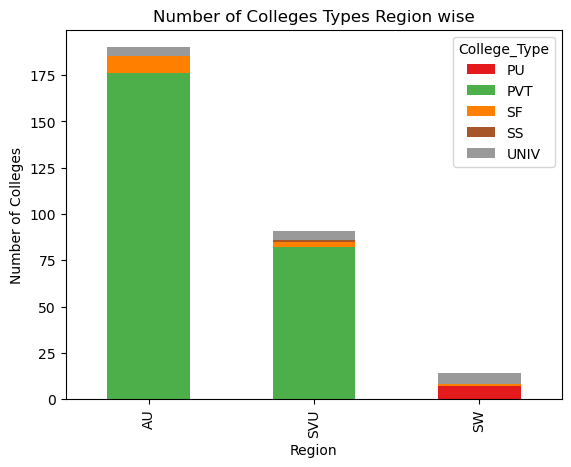

In [33]:
colleges_by_region_type = df.groupby(['Region', 'College_Type'])['College_Code'].nunique()

plt.figure(figsize=(10, 6))
colleges_by_region_type.unstack().plot(kind='bar', colormap='Set1', stacked=True)
plt.xlabel('Region')
plt.ylabel('Number of Colleges')
plt.title('Number of Colleges Types Region wise')
plt.show()


### No of Colleges District wise

<Figure size 1200x600 with 0 Axes>

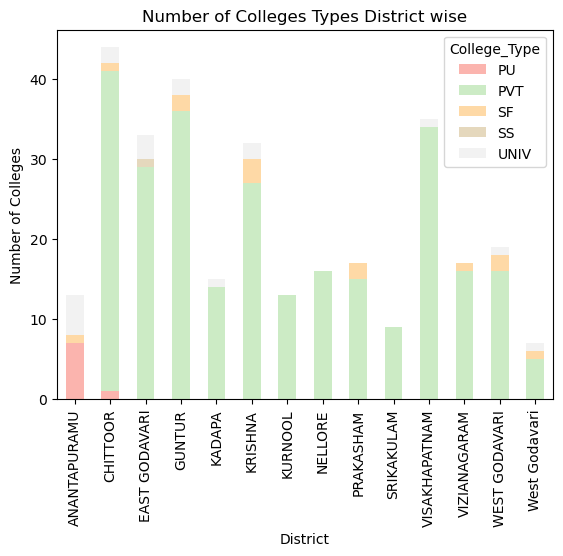

In [32]:
colleges_by_district_type = df.groupby(['District', 'College_Type'])['College_Code'].nunique()

# Visualization
plt.figure(figsize=(12, 6))
colleges_by_district_type.unstack().plot(kind='bar', colormap='Pastel1', stacked=True)
plt.xlabel('District')
plt.ylabel('Number of Colleges')
plt.title('Number of Colleges Types District wise')
plt.show()

###  No of Colleges Affliate Univ wise

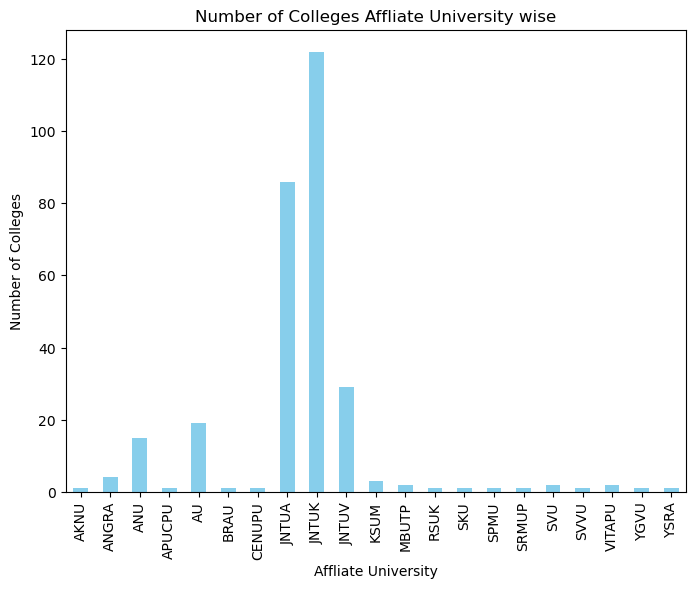

In [35]:
colleges_by_affliate_univ = df.groupby('Affliate_Univ')['College_Code'].nunique()
#print(colleges_by_affliate_univ)
plt.figure(figsize=(8, 6))
colleges_by_affliate_univ.plot(kind='bar', color='skyblue')
plt.xlabel('Affliate University')
plt.ylabel('Number of Colleges')
plt.title('Number of Colleges Affliate University wise')
plt.show()

### Colleges Distribution ESTD wise

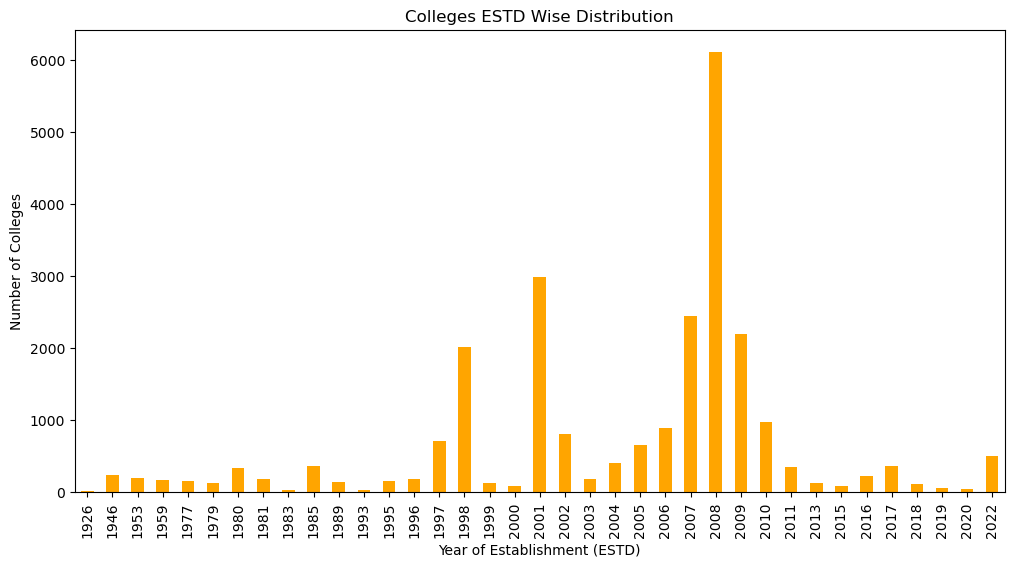

In [21]:
estd_distribution = df['ESTD'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
estd_distribution.plot(kind='bar', color='orange')
plt.xlabel('Year of Establishment (ESTD)')
plt.ylabel('Number of Colleges')
plt.title('Colleges ESTD Wise Distribution')
plt.show()


### College Wise Fee Correleation (Old Vs New)

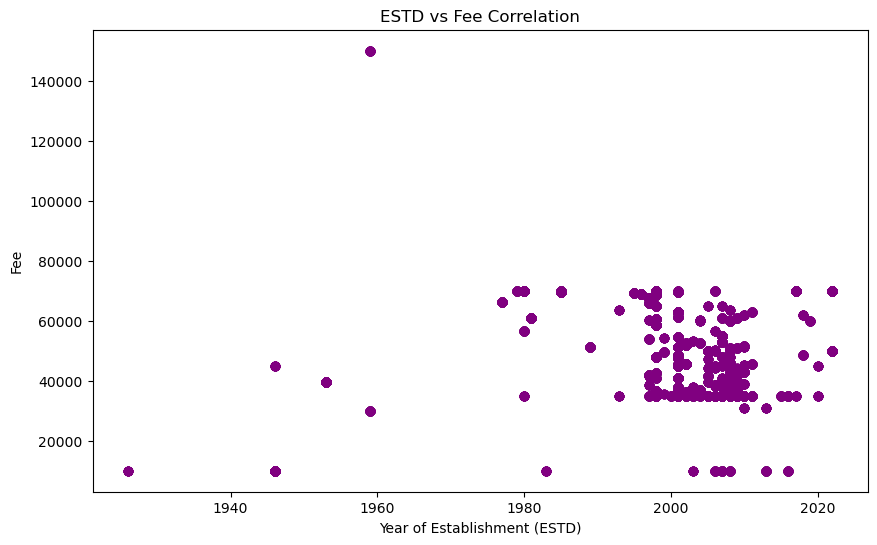

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ESTD'], df['Fee'], color='purple', alpha=0.7)
plt.xlabel('Year of Establishment (ESTD)')
plt.ylabel('Fee')
plt.title('ESTD vs Fee Correlation')
plt.show()